In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import re 
import pickle


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_attack_2022_location.csv")
print(df.shape)
df.head()

(246022, 43)


,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,latitude,longitude
0,0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,32.318231,-86.902298
1,1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,32.318231,-86.902298
2,2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,32.318231,-86.902298
3,3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,32.318231,-86.902298
4,4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,32.318231,-86.902298


In [3]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                   0
State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightIn

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 246022 non-null  int64  
 1   State                      246022 non-null  object 
 2   Sex                        246022 non-null  object 
 3   GeneralHealth              246022 non-null  object 
 4   PhysicalHealthDays         246022 non-null  float64
 5   MentalHealthDays           246022 non-null  float64
 6   LastCheckupTime            246022 non-null  object 
 7   PhysicalActivities         246022 non-null  object 
 8   SleepHours                 246022 non-null  float64
 9   RemovedTeeth               246022 non-null  object 
 10  HadHeartAttack             246022 non-null  object 
 11  HadAngina                  246022 non-null  object 
 12  HadStroke                  246022 non-null  object 
 13  HadAsthma                  24

In [5]:
 # Select string columns
string_cols = df.select_dtypes(include=['object'])

# Count unique categories for each string column
unique_counts = string_cols.nunique()
unique_counts

State                        54
Sex                           2
GeneralHealth                 5
LastCheckupTime               4
PhysicalActivities            2
RemovedTeeth                  4
HadHeartAttack                2
HadAngina                     2
HadStroke                     2
HadAsthma                     2
HadSkinCancer                 2
HadCOPD                       2
HadDepressiveDisorder         2
HadKidneyDisease              2
HadArthritis                  2
HadDiabetes                   4
DeafOrHardOfHearing           2
BlindOrVisionDifficulty       2
DifficultyConcentrating       2
DifficultyWalking             2
DifficultyDressingBathing     2
DifficultyErrands             2
SmokerStatus                  4
ECigaretteUsage               4
ChestScan                     2
RaceEthnicityCategory         5
AgeCategory                  13
AlcoholDrinkers               2
HIVTesting                    2
FluVaxLast12                  2
PneumoVaxEver                 2
TetanusL

In [6]:
df.head()

,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,latitude,longitude
0,0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,32.318231,-86.902298
1,1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,32.318231,-86.902298
2,2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,32.318231,-86.902298
3,3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,32.318231,-86.902298
4,4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,32.318231,-86.902298


In [7]:
df.Sex.value_counts()

Sex
Female    127811
Male      118211
Name: count, dtype: int64

In [8]:
 df.groupby("Sex").BMI.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,127811.0,28.619383,7.054929,12.02,23.57,27.44,32.22,97.65
Male,118211.0,28.720848,5.872868,12.16,24.96,27.80,31.57,97.65


In [9]:
df.groupby("Sex").PhysicalHealthDays.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,127811.0,4.475374,8.607564,0.0,0.0,0.0,4.0,30.0
Male,118211.0,3.733739,8.164705,0.0,0.0,0.0,2.0,30.0


In [10]:
df.groupby("Sex").MentalHealthDays.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,127811.0,4.881747,8.562534,0.0,0.0,0.0,5.0,30.0
Male,118211.0,3.394498,7.497944,0.0,0.0,0.0,2.0,30.0


In [11]:
df.groupby("Sex").SleepHours.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,127811.0,7.043212,1.458613,1.0,6.0,7.0,8.0,24.0
Male,118211.0,6.997674,1.420666,1.0,6.0,7.0,8.0,24.0


In [12]:
 # Dealing with Strings
# Ticket, Name, Embarked, Sex, (Pclass), Has_Cabin
# Only four are categories: Embarked, Sex, PClass, Has_Cabin

# DROP: Ticket & Name columns
# Future work: Extract the titles from the NAME column to use as an additional category
cols_to_drop = ["Unnamed: 0", "latitude", "longitude"]
df.drop(columns=cols_to_drop, inplace=True)
# 
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [14]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [15]:
df.head(4)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [16]:
# Determine the number of unique values in each column.
cols = ["State","Sex",	"GeneralHealth", "PhysicalHealthDays", "MentalHealthDays",	"LastCheckupTime", "PhysicalActivities", "SleepHours", 
        "RemovedTeeth", "HadHeartAttack",	"HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer",	"HadCOPD",	"HadDepressiveDisorder",	
        "HadKidneyDisease", "HadArthritis",	"HadDiabetes", "DeafOrHardOfHearing", "BlindOrVisionDifficulty",	"DifficultyConcentrating",	
        "DifficultyWalking",  "DifficultyDressingBathing",	"DifficultyErrands",	"SmokerStatus", "ECigaretteUsage", "ChestScan",	
        "RaceEthnicityCategory",	"AgeCategory", "HeightInMeters","WeightInKilograms", "BMI", "AlcoholDrinkers", "HIVTesting", "FluVaxLast12", 
        "PneumoVaxEver", "TetanusLast10Tdap", "HighRiskLastYear", "CovidPos"]

for col in cols:
  print(col)
  print(df[col].nunique())
  print(df[col].value_counts())
  print()

State
54
State
Washington              15000
Maryland                 9165
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5462
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4845
South Dakota             4405
Montana                  4264
Missouri                 4195
New Jersey               3967
New Hampshire            3756
Puerto Rico              3589
Idaho                    3468
Alaska                   

In [17]:
 # Encoding, separate out features
meta = ['HadHeartAttack']
num_features = ['PhysicalHealthDays', 'SleepHours', 'BMI', 'MentalHealthDays','AgeCategory']
cat_features = ['Sex', 'RaceEthnicityCategory','SmokerStatus','AlcoholDrinkers','GeneralHealth']

In [18]:
df_meta= df.loc[:, meta]
df_meta.describe()

,HadHeartAttack
count,246022
unique,2
top,No
freq,232587


In [19]:
df_meta['HadHeartAttack'] = df_meta.HadHeartAttack.apply(lambda x: 0 if x == "Yes" else 1)
df_meta.head()

,HadHeartAttack
0,1
1,1
2,1
3,1
4,1


In [20]:
# NUMERIC FIRST - Do we need a SCALER?
df_num = df.loc[:, num_features]
df_num.describe()

,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays
count,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,7.021331,28.668136,4.167140
std,8.405844,1.440681,6.513973,8.102687
min,0.000000,1.000000,12.020000,0.000000
25%,0.000000,6.000000,24.270000,0.000000
50%,0.000000,7.000000,27.460000,0.000000
75%,3.000000,8.000000,31.890000,4.000000
max,30.000000,24.000000,97.650000,30.000000


In [21]:
# Categorical Up Next
df_cat = df.loc[:, cat_features]
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,Female,"White only, Non-Hispanic",Former smoker,No,Very good
1,Male,"White only, Non-Hispanic",Former smoker,No,Very good
2,Male,"White only, Non-Hispanic",Former smoker,Yes,Very good
3,Female,"White only, Non-Hispanic",Never smoked,No,Fair
4,Female,"White only, Non-Hispanic",Never smoked,No,Good


In [22]:
# Label Encode SEX
df_cat["Sex"] = df_cat.Sex.apply(lambda x: 0 if x == "Male" else 1)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,"White only, Non-Hispanic",Former smoker,No,Very good
1,0,"White only, Non-Hispanic",Former smoker,No,Very good
2,0,"White only, Non-Hispanic",Former smoker,Yes,Very good
3,1,"White only, Non-Hispanic",Never smoked,No,Fair
4,1,"White only, Non-Hispanic",Never smoked,No,Good


In [23]:
# Label Encode SEX
df_cat["AlcoholDrinkers"] = df_cat.AlcoholDrinkers.apply(lambda x: 0 if x == "Yes" else 1)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,"White only, Non-Hispanic",Former smoker,1,Very good
1,0,"White only, Non-Hispanic",Former smoker,1,Very good
2,0,"White only, Non-Hispanic",Former smoker,0,Very good
3,1,"White only, Non-Hispanic",Never smoked,1,Fair
4,1,"White only, Non-Hispanic",Never smoked,1,Good


In [24]:
df_cat.RaceEthnicityCategory.value_counts()

RaceEthnicityCategory
White only, Non-Hispanic         186336
Hispanic                          22570
Black only, Non-Hispanic          19330
Other race only, Non-Hispanic     12205
Multiracial, Non-Hispanic          5581
Name: count, dtype: int64

In [25]:
print(type(cat_features))
cat_features = pd.DataFrame(cat_features)

<class 'list'>


In [26]:
# Label Encode RaceEthnicityCategory
df_cat.RaceEthnicityCategory.replace({
    "White only, Non-Hispanic": 0,
    "Hispanic": 1,
    "Black only, Non-Hispanic": 2,
    "Other race only, Non-Hispanic": 3,
    "Multiracial, Non-Hispanic": 4
}, inplace =True)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,0,Former smoker,1,Very good
1,0,0,Former smoker,1,Very good
2,0,0,Former smoker,0,Very good
3,1,0,Never smoked,1,Fair
4,1,0,Never smoked,1,Good


In [27]:
df_num.AgeCategory.replace({
"Age 18 to 24": 21,
"Age 25 to 29": 27,
"Age 30 to 34": 32,
"Age 35 to 39": 37,
"Age 40 to 44": 42,
"Age 45 to 49": 47,
"Age 50 to 54": 52,
"Age 55 to 59": 57,
"Age 60 to 64": 62,
"Age 65 to 69": 67,
"Age 70 to 74": 72,
"Age 75 to 79":77,
"Age 80 or older":83}, inplace=True)# 83 Is chosen beacuse from census data available on census.gov for 2020 83 is the median age for this age group
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,0,Former smoker,1,Very good
1,0,0,Former smoker,1,Very good
2,0,0,Former smoker,0,Very good
3,1,0,Never smoked,1,Fair
4,1,0,Never smoked,1,Good


In [28]:
df_cat.GeneralHealth.replace({
    "Excellent": 0,
    "Very good": 1,
    "Good": 2,
    "Fair": 3,
    "Poor": 4}, inplace=True)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,0,Former smoker,1,1
1,0,0,Former smoker,1,1
2,0,0,Former smoker,0,1
3,1,0,Never smoked,1,3
4,1,0,Never smoked,1,2


In [29]:
df_cat.SmokerStatus.replace({
    "Former smoker" : 1,
    "Never smoked" : 1,
    "Current smoker - now smokes every day": 0,
    "Current smoker - now smokes some days": 0}, inplace=True)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,0,1,1,1
1,0,0,1,1,1
2,0,0,1,0,1
3,1,0,1,1,3
4,1,0,1,1,2


In [30]:
# # Put Everything Back Together
# df_final = df.loc[:,meta]
df_final = pd.concat([df_meta, df_num], axis=1)
df_final = pd.concat([df_final, df_cat], axis=1)
df_final.head()

,HadHeartAttack,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,AgeCategory,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,4.0,9.0,27.99,0.0,67,1,0,1,1,1
1,1,0.0,6.0,30.13,0.0,72,0,0,1,1,1
2,1,0.0,8.0,31.66,0.0,77,0,0,1,0,1
3,1,5.0,9.0,31.32,0.0,83,1,0,1,1,3
4,1,3.0,5.0,33.07,15.0,83,1,0,1,1,2


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HadHeartAttack         246022 non-null  int64  
 1   PhysicalHealthDays     246022 non-null  float64
 2   SleepHours             246022 non-null  float64
 3   BMI                    246022 non-null  float64
 4   MentalHealthDays       246022 non-null  float64
 5   AgeCategory            246022 non-null  int64  
 6   Sex                    246022 non-null  int64  
 7   RaceEthnicityCategory  246022 non-null  int64  
 8   SmokerStatus           246022 non-null  int64  
 9   AlcoholDrinkers        246022 non-null  int64  
 10  GeneralHealth          246022 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 20.6 MB


In [32]:
 # YES we need a scaler

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_num)

# predict/transform
scaled_data = scaler.transform(df_num)
df_scaled = pd.DataFrame(scaled_data, columns=num_features)

df_scaled.head()

,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,AgeCategory
0,-0.014160,1.373428,-0.104105,-0.514292,0.649266
1,-0.490020,-0.708924,0.224420,-0.514292,0.934270
2,-0.490020,0.679311,0.459300,-0.514292,1.219274
3,0.104805,1.373428,0.407105,-0.514292,1.561278
4,-0.133125,-1.403041,0.675759,1.336949,1.561278


In [33]:
### catagorical coding for health and age in one column each... Example age avg 72 (mind point)

In [34]:
# Feature selection
# correlation analysis
corrs = df_final.corr()
corrs

,HadHeartAttack,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,AgeCategory,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
HadHeartAttack,1.000000,-0.133420,-0.003631,-0.030413,-0.025892,-0.172213,0.073316,0.014340,0.039991,-0.074181,-0.185680
PhysicalHealthDays,-0.133420,1.000000,-0.056063,0.116905,0.306800,0.089769,0.044081,0.004341,-0.094102,0.129370,0.489091
SleepHours,-0.003631,-0.056063,1.000000,-0.054750,-0.130100,0.125618,0.015793,-0.073083,0.063784,0.003540,-0.068927
BMI,-0.030413,0.116905,-0.054750,1.000000,0.082182,-0.025482,-0.007782,0.025806,0.020130,0.070867,0.243437
MentalHealthDays,-0.025892,0.306800,-0.130100,0.082182,1.000000,-0.189853,0.091705,0.031750,-0.126499,0.025991,0.268539
AgeCategory,-0.172213,0.089769,0.125618,-0.025482,-0.189853,1.000000,0.053949,-0.175140,0.057541,0.123851,0.131345
Sex,0.073316,0.044081,0.015793,-0.007782,0.091705,0.053949,1.000000,0.008963,0.014236,0.093824,0.018106
RaceEthnicityCategory,0.014340,0.004341,-0.073083,0.025806,0.031750,-0.175140,0.008963,1.000000,-0.031628,0.076253,0.057457
SmokerStatus,0.039991,-0.094102,0.063784,0.020130,-0.126499,0.057541,0.014236,-0.031628,1.000000,-0.012109,-0.136468
AlcoholDrinkers,-0.074181,0.129370,0.003540,0.070867,0.025991,0.123851,0.093824,0.076253,-0.012109,1.000000,0.178229


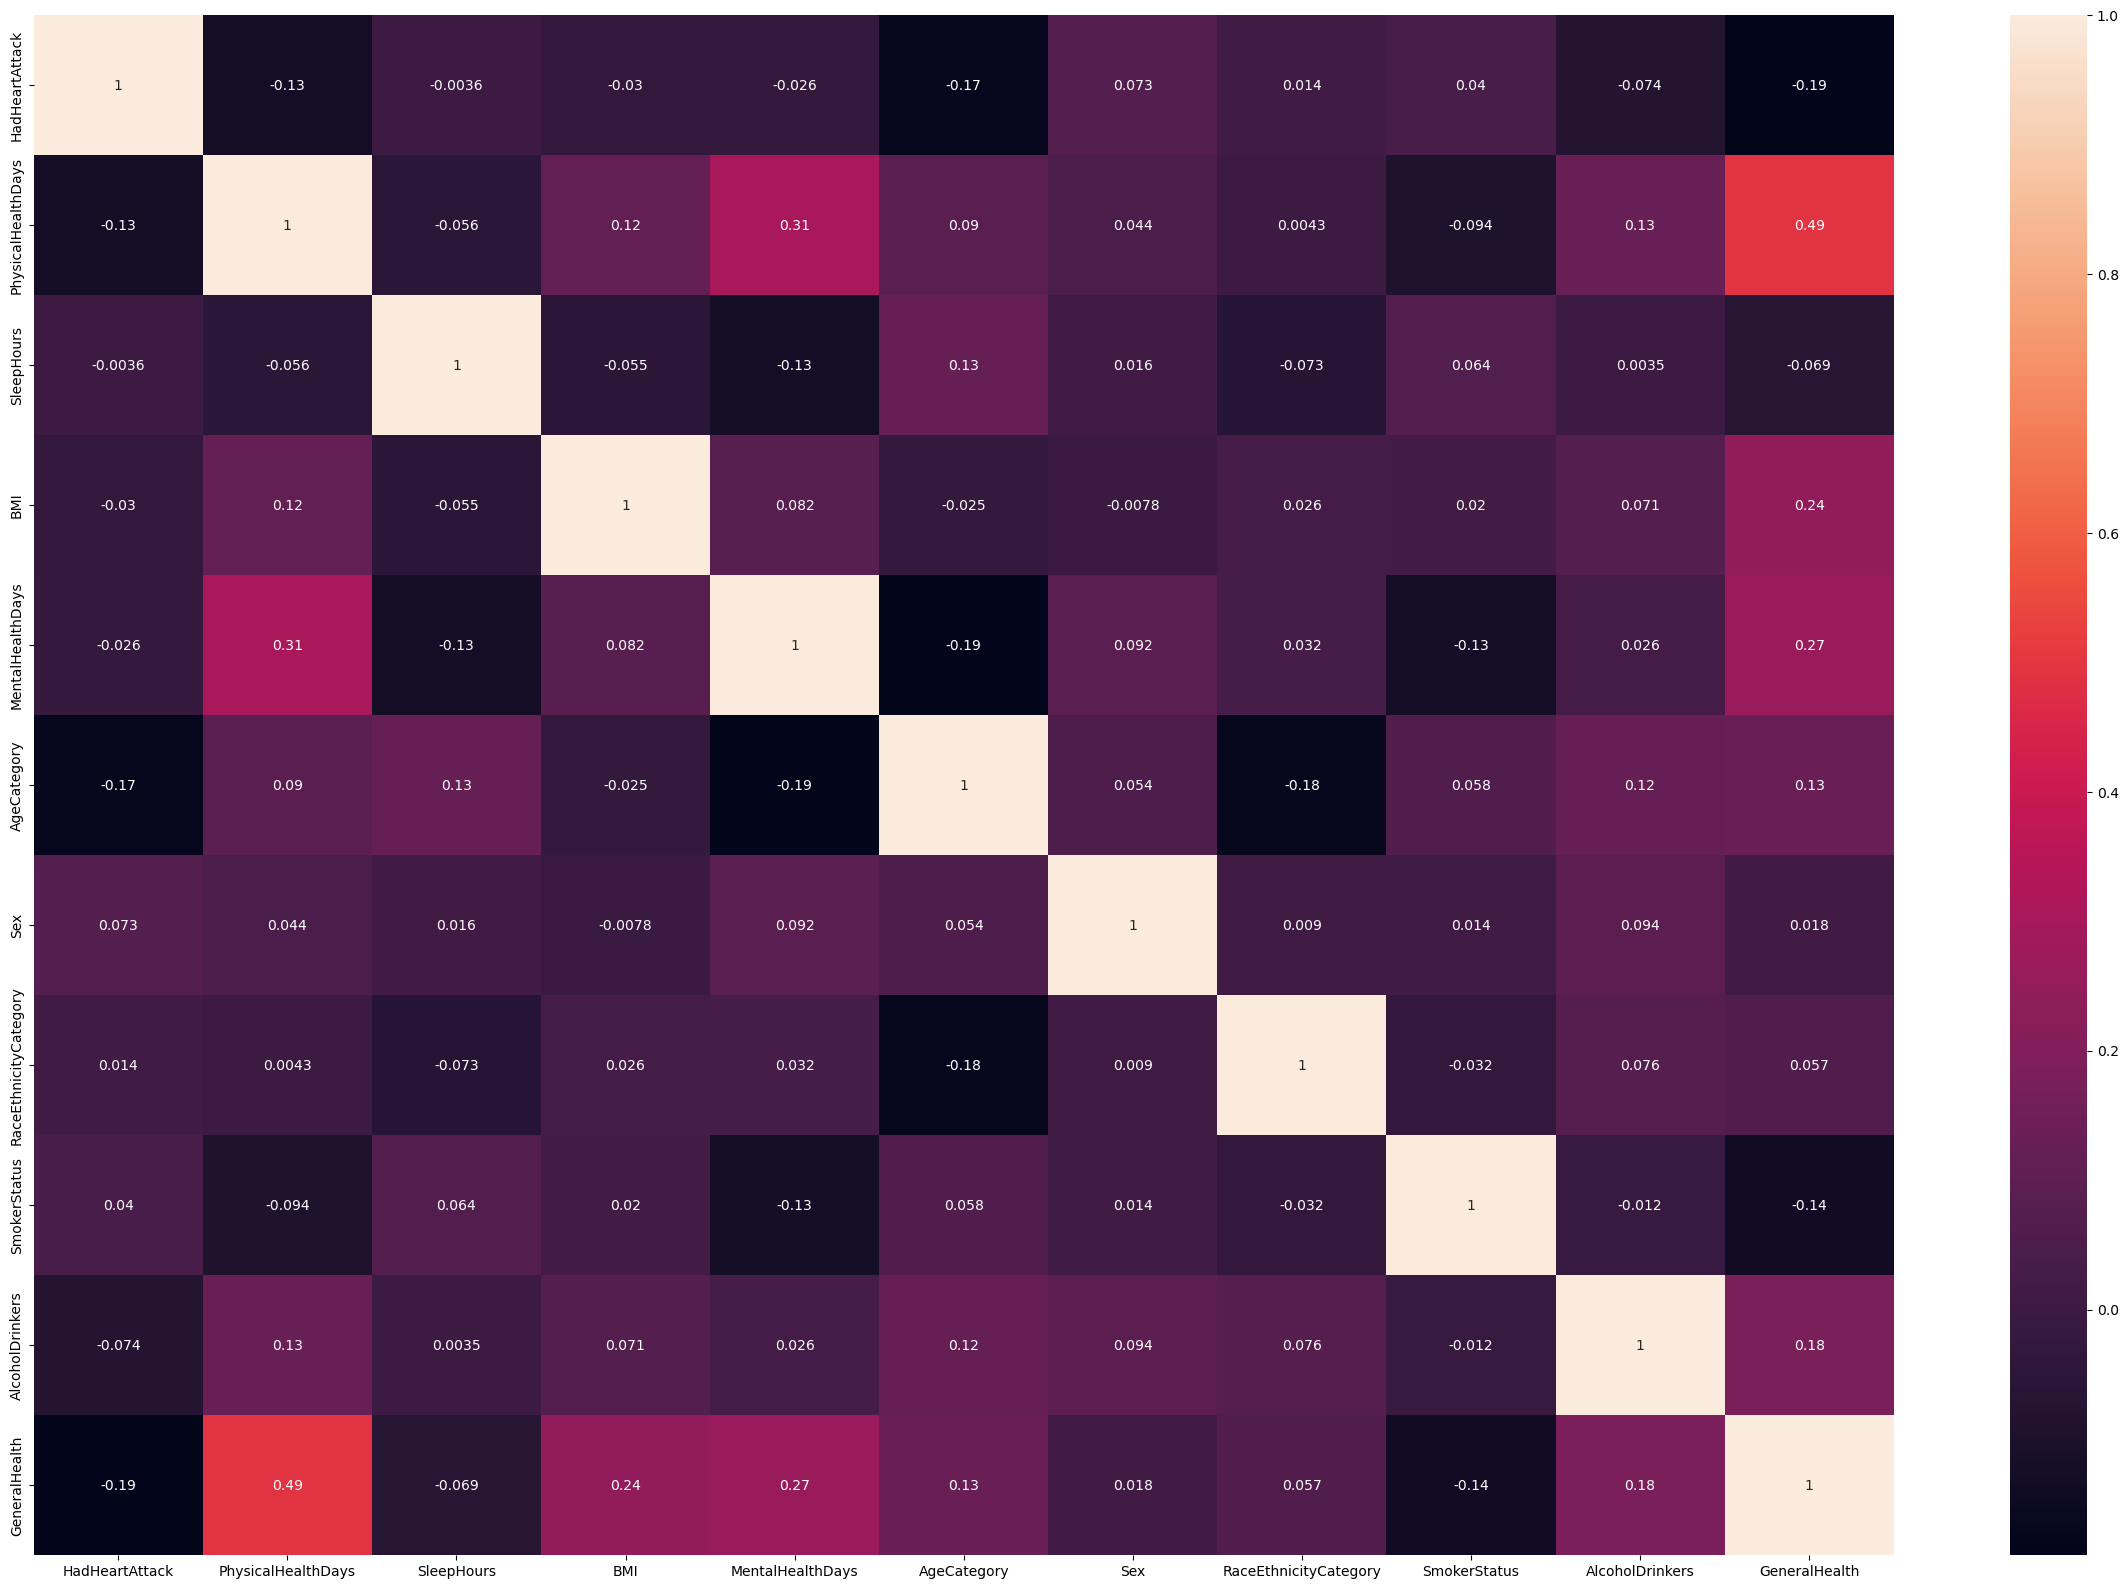

In [35]:
plt.figure(figsize=(30,20))
sns.heatmap(corrs, annot=True)
plt.show()

In [36]:
 abs(corrs.HadHeartAttack).sort_values(ascending=False)

HadHeartAttack           1.000000
GeneralHealth            0.185680
AgeCategory              0.172213
PhysicalHealthDays       0.133420
AlcoholDrinkers          0.074181
Sex                      0.073316
SmokerStatus             0.039991
BMI                      0.030413
MentalHealthDays         0.025892
RaceEthnicityCategory    0.014340
SleepHours               0.003631
Name: HadHeartAttack, dtype: float64

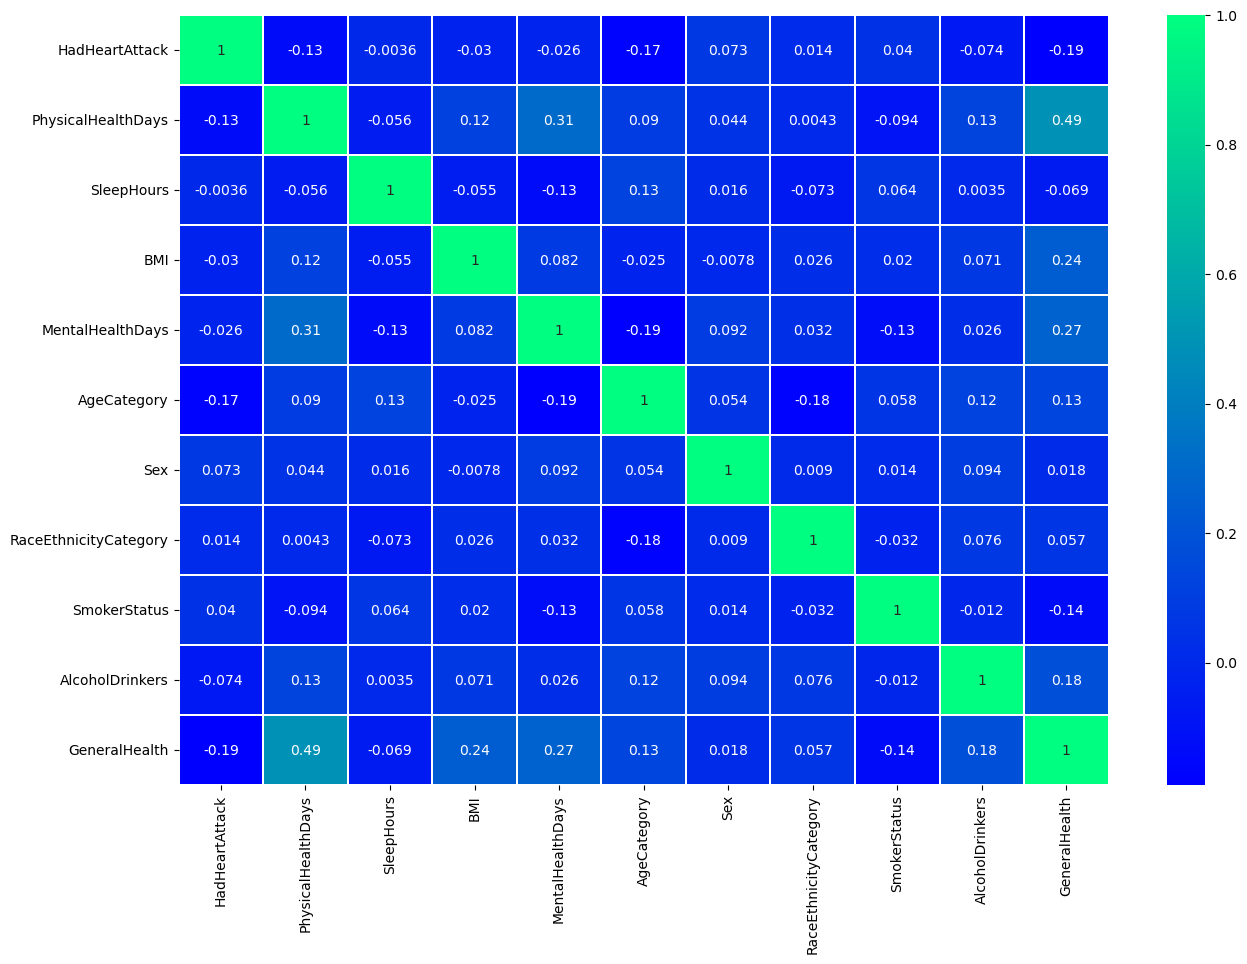

<Figure size 640x480 with 0 Axes>

In [37]:
# sources or inspiration https://www.analyticsvidhya.com/blog/2022/02/heart-disease-prediction-using-machine-learning-2/
plt.figure(figsize=(15,10))
sns.heatmap(df_final.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

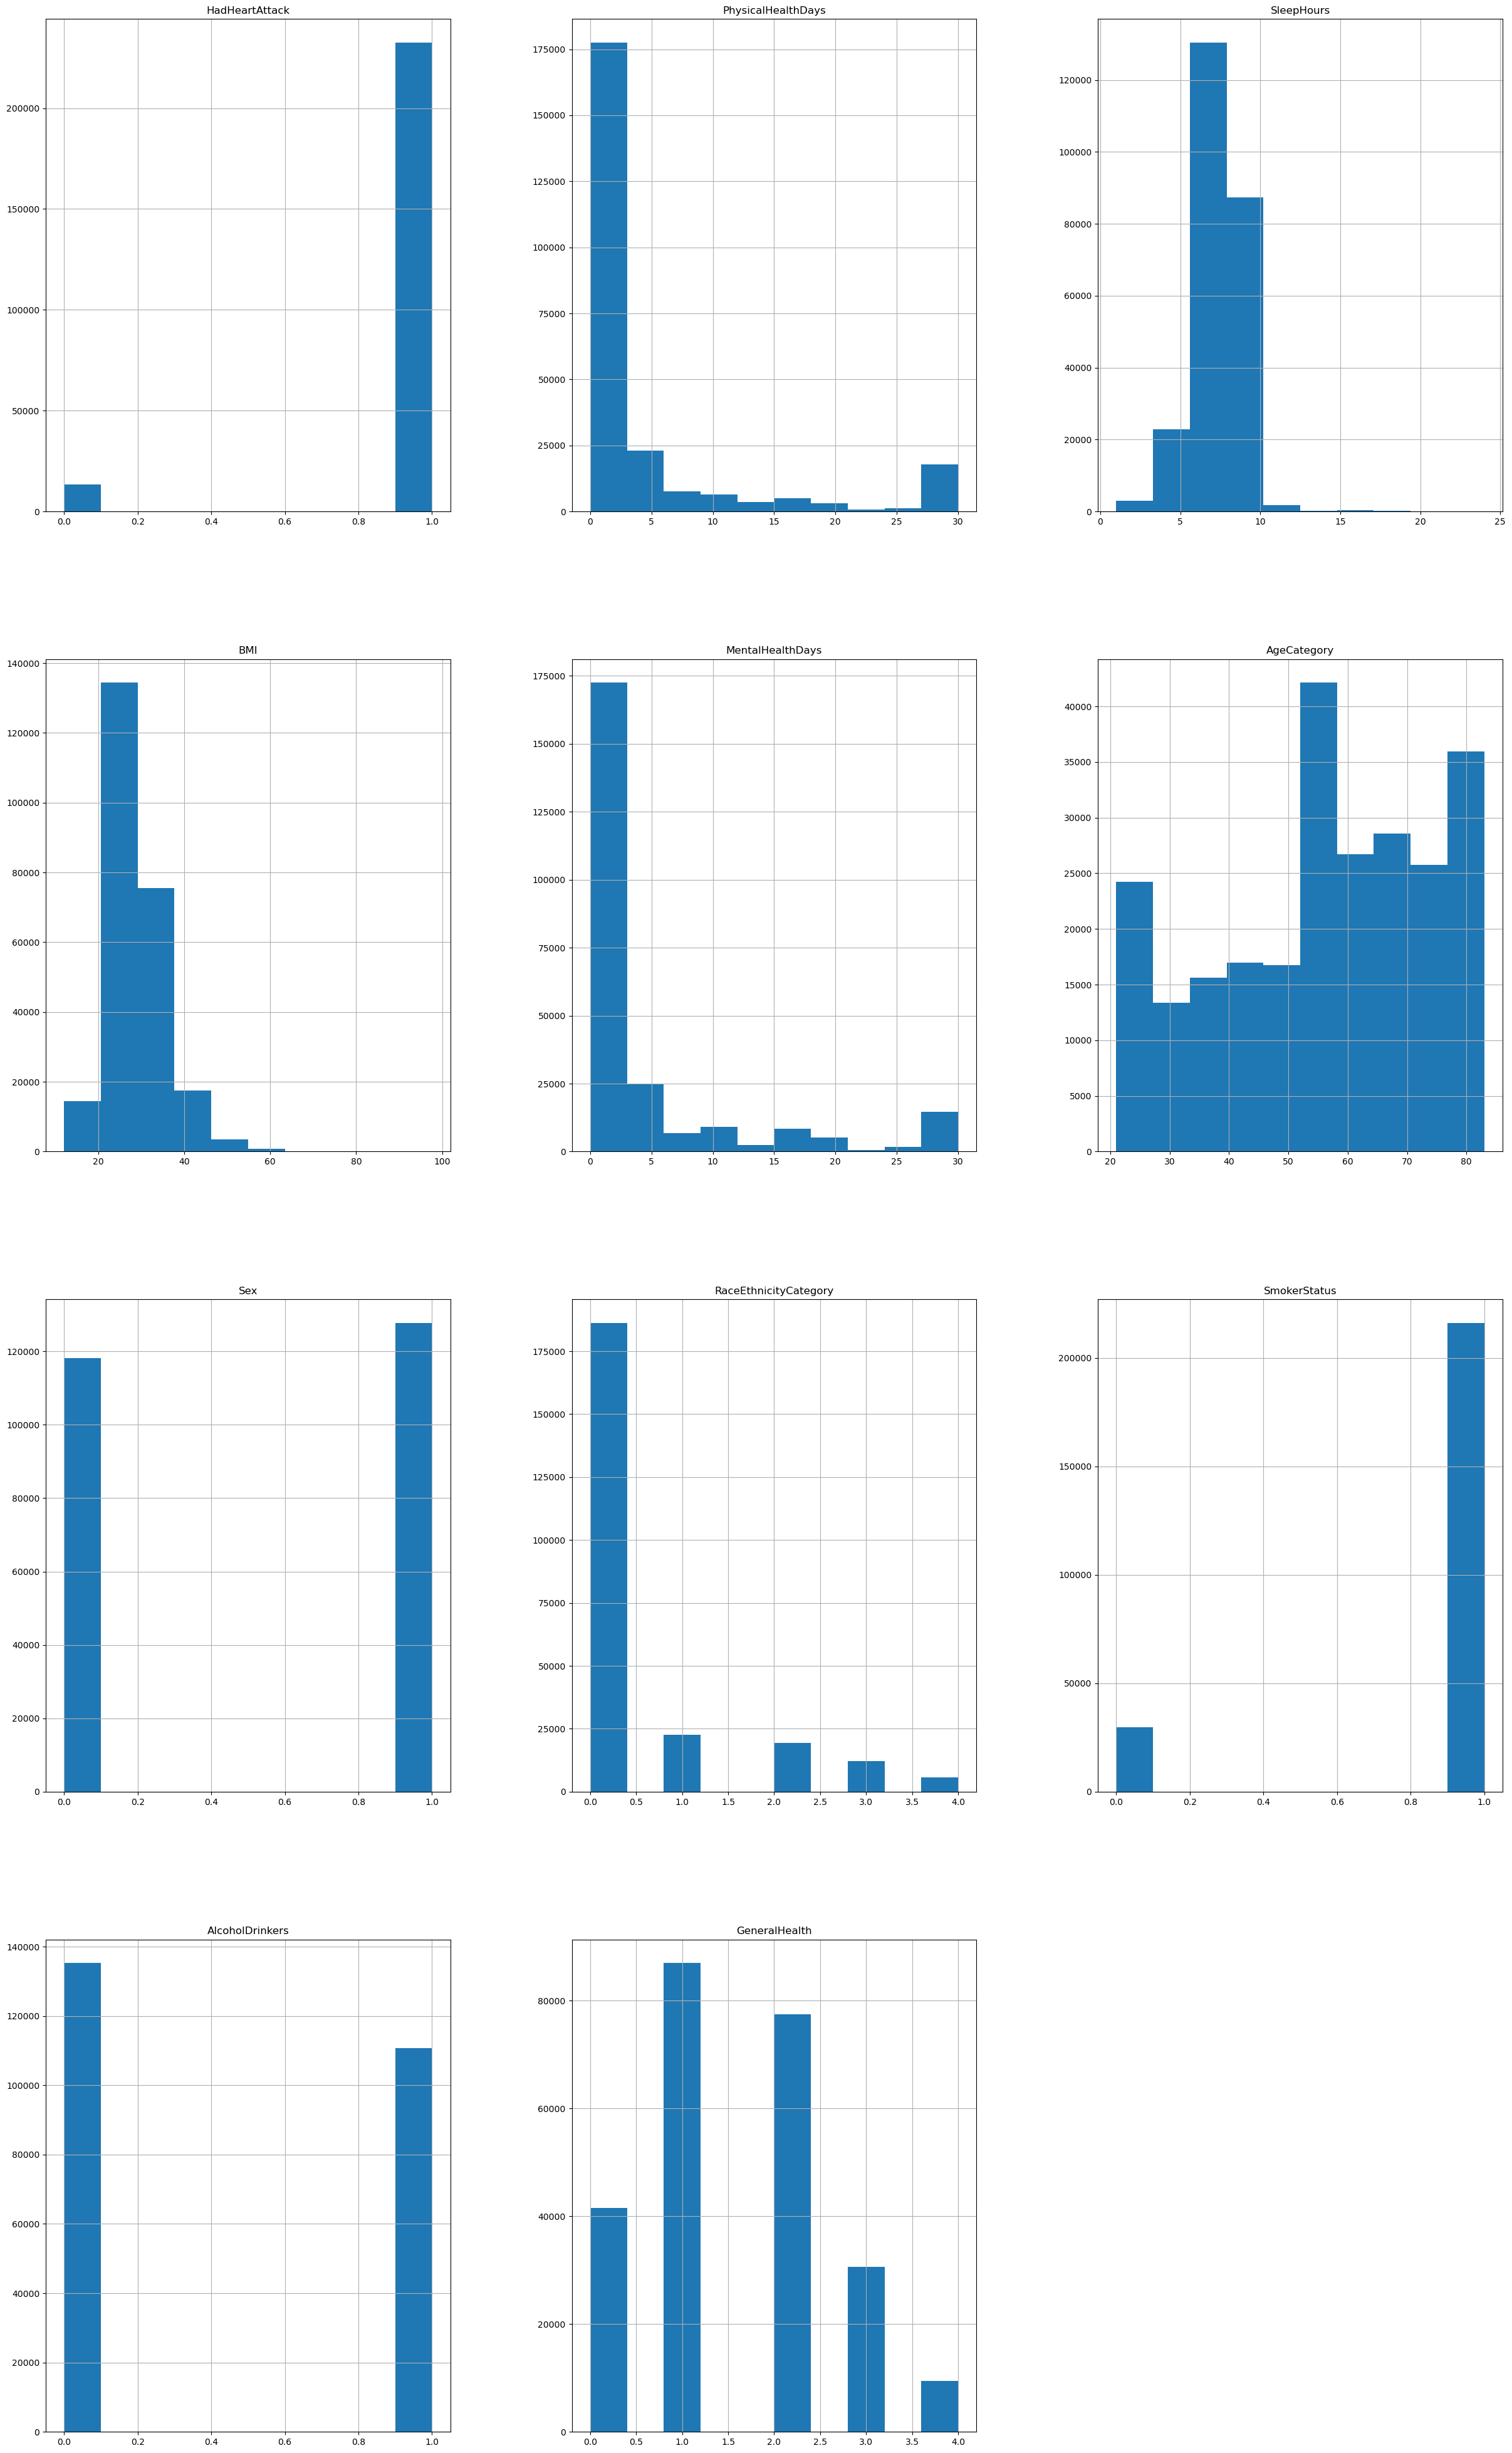

In [38]:
df_final.hist(figsize=(30,50))
plt.savefig('featuresplot')

In [39]:
# Step 1: Get the data
X = df_final.drop(columns=["HadHeartAttack"])
y = df_final.HadHeartAttack

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(184516, 10) (61506, 10)


In [40]:
X_train.head()

,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,AgeCategory,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
116564,0.0,8.0,26.39,8.0,47,1,2,1,0,2
65562,0.0,6.0,22.31,0.0,32,1,0,1,0,0
178884,2.0,8.0,18.79,0.0,52,0,2,1,0,2
183153,30.0,5.0,24.96,30.0,21,1,0,1,0,4
50759,0.0,6.0,24.96,0.0,72,1,0,1,1,2


In [41]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [42]:
ef doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[   118   9958]
 [   160 174280]]
    
    AUC: 0.8091335803750246

    Classification Report:
                  precision    recall  f1-score   support

           0       0.42      0.01      0.02     10076
           1       0.95      1.00      0.97    174440

    accuracy                           0.95    184516
   macro avg       0.69      0.51      0.50    184516
weighted avg       0.92      0.95      0.92    184516

    
TEST METRICS
    Confusion Matrix: 
    [[   49  3310]
 [   77 58070]]
    
    AUC: 0.8097088886927736

    Classification Report:
                  precision    recall  f1-score   support

           0       0.39      0.01      0.03      3359
           1       0.95      1.00      0.97     58147

    accuracy                           0.94     61506
   macro avg       0.67      0.51      0.50     61506
weighted avg       0.92      0.94      0.92     61506

    


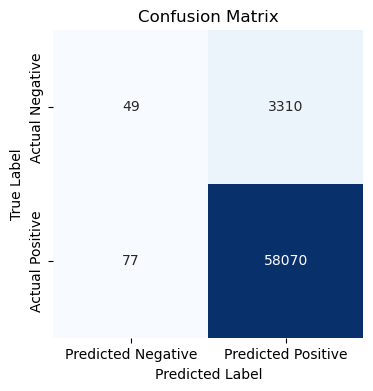

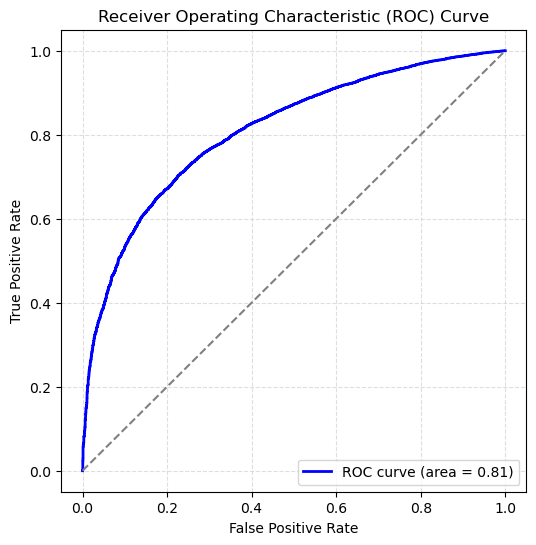

In [43]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[  9756    320]
 [   492 173948]]
    
    AUC: 0.9997762098057059

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.97      0.96     10076
           1       1.00      1.00      1.00    174440

    accuracy                           1.00    184516
   macro avg       0.98      0.98      0.98    184516
weighted avg       1.00      1.00      1.00    184516

    
TEST METRICS
    Confusion Matrix: 
    [[  517  2842]
 [ 3536 54611]]
    
    AUC: 0.547089640323109

    Classification Report:
                  precision    recall  f1-score   support

           0       0.13      0.15      0.14      3359
           1       0.95      0.94      0.94     58147

    accuracy                           0.90     61506
   macro avg       0.54      0.55      0.54     61506
weighted avg       0.91      0.90      0.90     61506

    


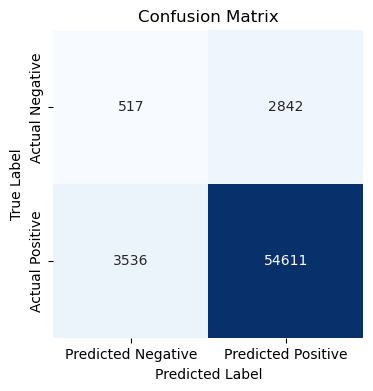

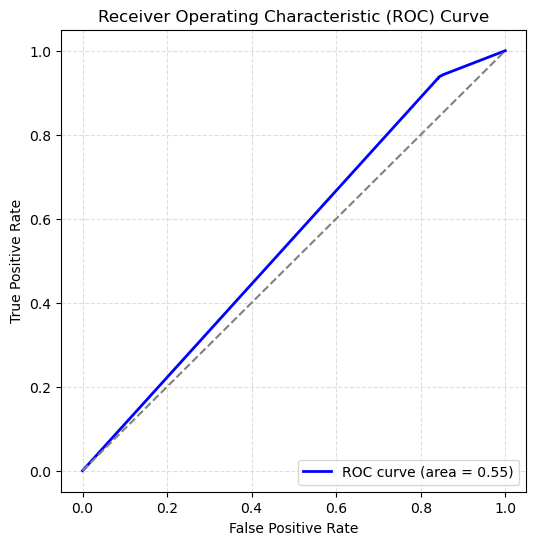

In [44]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=30)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[  9332    744]
 [    73 174367]]
    
    AUC: 0.9995903598826401

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      0.93      0.96     10076
           1       1.00      1.00      1.00    174440

    accuracy                           1.00    184516
   macro avg       0.99      0.96      0.98    184516
weighted avg       1.00      1.00      1.00    184516

    
TEST METRICS
    Confusion Matrix: 
    [[  154  3205]
 [  772 57375]]
    
    AUC: 0.7348084811358271

    Classification Report:
                  precision    recall  f1-score   support

           0       0.17      0.05      0.07      3359
           1       0.95      0.99      0.97     58147

    accuracy                           0.94     61506
   macro avg       0.56      0.52      0.52     61506
weighted avg       0.90      0.94      0.92     61506

    


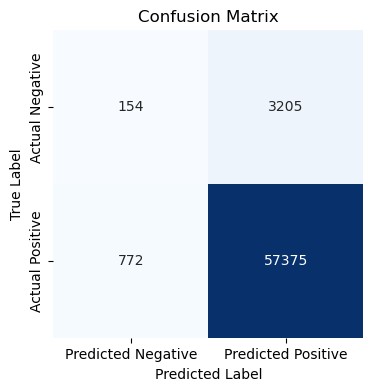

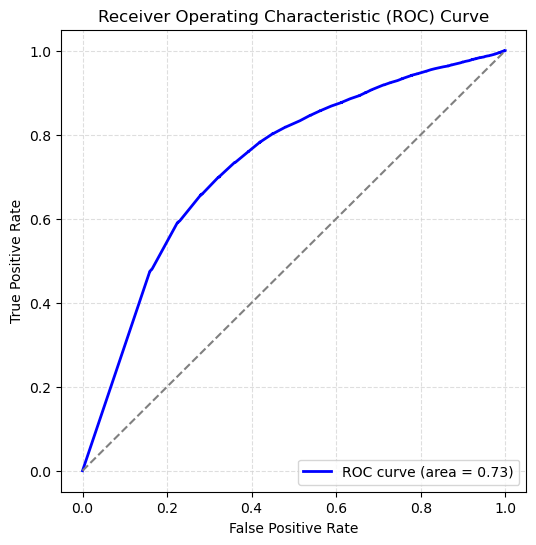

In [45]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=20)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

In [ ]:
 # Step 2: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

In [ ]:
 # Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

In [ ]:
 # Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

In [ ]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

In [ ]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [ ]:
 from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
 # Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

In [ ]:
# Train and test columns are the same
temp_cols =[c.replace(' ', '_').replace('-', '_') for c in X_train.columns]
print(temp_cols)

In [ ]:
# X_train_LGBM = X_train.copy()
# X_train_LGBM.columns = temp_cols
# X_test_LGBM = X_test.copy()
# X_test_LGBM.columns = temp_cols

In [ ]:
X_train_lgbm, X_test_lgbm = [X.rename(columns=lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) for X in (X_train, X_test)]

In [ ]:
# Step 2: Init the Model 
# 
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train_lgbm, X_test_lgbm, y_train, y_test)

In [ ]:
X_train.columns
# maybe space between name in columns. 

In [ ]:
X_test

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, gb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, xgb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, ada.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
# Retrain the model on the ENTIRE dataset
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X, y)

In [ ]:
 # Save off my models
import pickle

# Scaler
pickle.dump(scaler, open("heartattack_scaler.h5", 'wb'))

# Model
pickle.dump(gb, open("heartattack.h5", 'wb'))